**Machine Learning - Assignment 3** <br>
COVID-19 30-day Mortality Prediction from CXR Report

> 106070038 杜葳葳




**Model 1**

In [ ]:
# automatically reload updated sub-modules
%reload_ext autoreload
%autoreload 2
# in-line plots
%matplotlib inline
!pip install fastai==2.1.10

In [ ]:
!pip install fastai --upgrade
!pip install -Uqq fastbook

In [3]:
import fastbook
from fastbook import *
from fastai.vision import *
#from fastai.vision.data import ImageDataLoaders

dls = ImageDataLoaders.from_folder('/content/data',valid_pct=0.2)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=1.2022644114040304e-05)

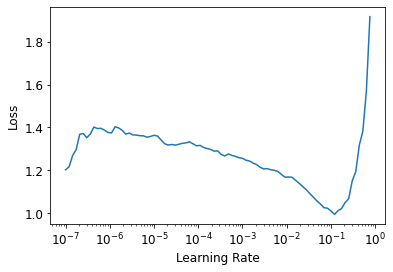

In [49]:
f1_score_multi = F1Score(average="micro")
#fc_head = nn.Sequential(Flatten(),nn.Linear(512,2))
learn = cnn_learner(dls, squeezenet1_0, pretrained=True, normalize = False, metrics=f1_score_multi)
learn.lr_find()

In [50]:
print(learn.summary())

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 96 x 157 x 157 
Conv2d                                    14208      False     
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 78 x 78   
Conv2d                                    1552       False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 78 x 78   
Conv2d                                    1088       False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 78 x 78   
Conv2d                                    9280       False  

In [51]:
learn.fit_one_cycle(50, 0.001)

epoch,train_loss,valid_loss,f1_score,time
0,1.271255,0.819801,0.517986,00:04
1,1.213317,0.843114,0.532374,00:04
2,1.195272,0.819339,0.586331,00:04
3,1.142947,0.782690,0.607914,00:04
4,1.070522,0.668789,0.676259,00:04
5,0.996646,0.614491,0.676259,00:04
6,0.913123,0.546275,0.755396,00:04
7,0.839978,0.497231,0.773381,00:04
8,0.741882,0.473382,0.798561,00:04
9,0.647882,0.435919,0.816547,00:04


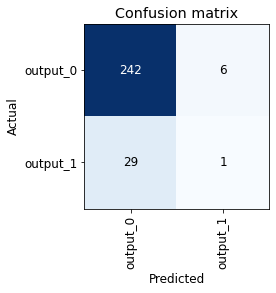

In [57]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
import pandas as pd
pred_data = pd.read_csv('/content/prediction_example.csv')
## check input data size
size = pred_data.shape[0]
size

457

In [19]:
from PIL import *
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
import numpy as np

**讀入Testing Data**<br>
Prediction

In [21]:
for i in range(size):
  img_id = pred_data.iloc[i,0]
  path = '/content/IML_CXR_TEST/'+str(img_id)+'.jpg'
  #arr = plt.imread(path)
  pil2tensor = transforms.ToTensor()
  ##tensor2pil = transforms.ToPILImage()
  arr = plt.imread(path)
  img = pil2tensor(arr)
  ##pil_image = Image.open(path)
  ##img = pil2tensor(pil_image)
  pred = learn.predict(arr)
  #print('img_id:')
  #print(img)
  #print('pred:')
  #print(pred)
  a = int(1)
  b = int(0)
  if pred[0]=='output_0':
    pred_data.iloc[i,1] = b
  else:
    pred_data.iloc[i,1] = a
  #pred_data.iloc[i,1] = pred

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [22]:
pred_data = pred_data.astype(int)
type(pred_data.iloc[1,1])

numpy.int64

In [23]:
pred_data

,PATIENT ID,hospital_outcome
0,51,1
1,54,1
2,59,0
3,60,0
4,61,0
...,...,...
452,2526,1
453,2538,0
454,2554,1
455,2567,0


In [24]:
pred_data.to_csv('./106070038.csv' , index=False )